**iNeuBytes** Micro Assessment

Task-1: Implement a Machine Learning Model for Heart Disease Classification

*Step*-1: Data Cleaning and Preprocessing

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#uploading dataset file
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (2).csv


In [3]:
#reading the dataset and assigning the dataframe
hd= pd.read_csv('heart.csv')

In [4]:
#calling the dataframe to display data
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
#displaying 1st 5rows of dataset
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


*Step*-2: Exploratory Data Analysis

In [6]:
#descriibing the statistics of data
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#displaying information of data
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
#checking for null values in dataset
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#displaying number of unique values of each column
hd.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

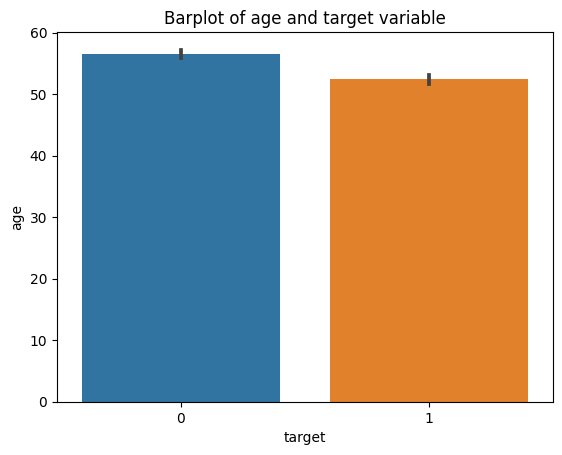

In [10]:
#Barplot
sns.barplot(x='target', y='age', data=hd)
plt.title("Barplot of age and target variable")
plt.show()

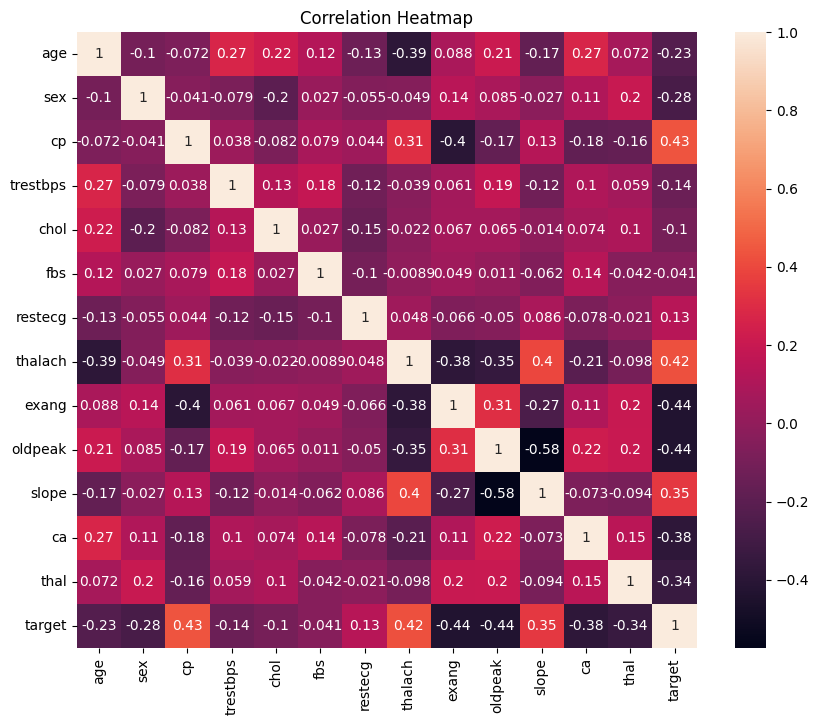

In [11]:
correlation_matrix = hd.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Adjust the size of the figure
sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Heatmap")
plt.show()


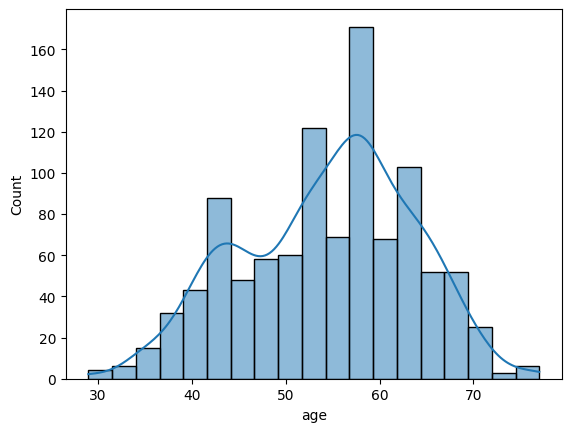

In [12]:
#Histogram plot
sns.histplot(hd['age'], kde=True)
plt.show()

Step-3: Model Building and Implementation

In [13]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
X = hd.target
y = hd.target


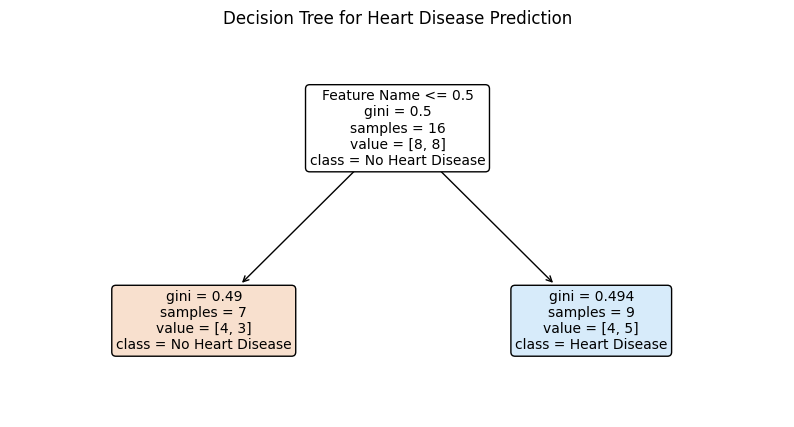

In [14]:
#importimg Decision tree library
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Sample feature data (1D array)
feature_data = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1]
# Sample target labels
target_labels = [0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1]

# Reshape the feature data to a 2D array
X = np.array(feature_data).reshape(-1, 1)

# Split the data into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, target_labels, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Fit the model to the training data
decision_tree.fit(X_train_dt, y_train_dt)

# Plot the decision tree
plt.figure(figsize=(10, 5))
plot_tree(decision_tree, filled=True, feature_names=['Feature Name'], class_names=['No Heart Disease', 'Heart Disease'], rounded=True, fontsize=10)
plt.title("Decision Tree for Heart Disease Prediction", fontsize=12)
plt.show()


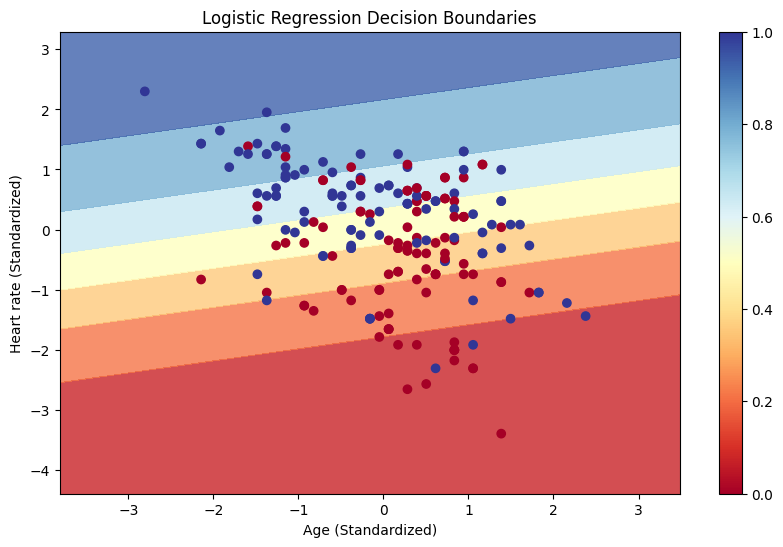

In [15]:
#importing libraries for Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select features (X) and target variable (y)
X = hd[['age', 'thalach']]  # Choose two features for visualization
y = hd['target']

# Standardize the features (important for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_lr, y_train_lr)

# Define a meshgrid for visualization
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class probabilities for the corresponding points on the grid
Z = logistic_regression.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the decision boundaries for Logistic Regression
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X_test_lr[:, 0], X_test_lr[:, 1], c=y_test_lr, cmap=plt.cm.RdYlBu)
plt.xlabel('Age (Standardized)')
plt.ylabel('Heart rate (Standardized)')
plt.title('Logistic Regression Decision Boundaries')
plt.colorbar()
plt.show()


Step-4: Evaluating the model

Logistic Regression Accuracy: 0.6390243902439025
Precision: 0.6283185840707964
Recall: 0.6893203883495146
F1 Score: 0.6574074074074074


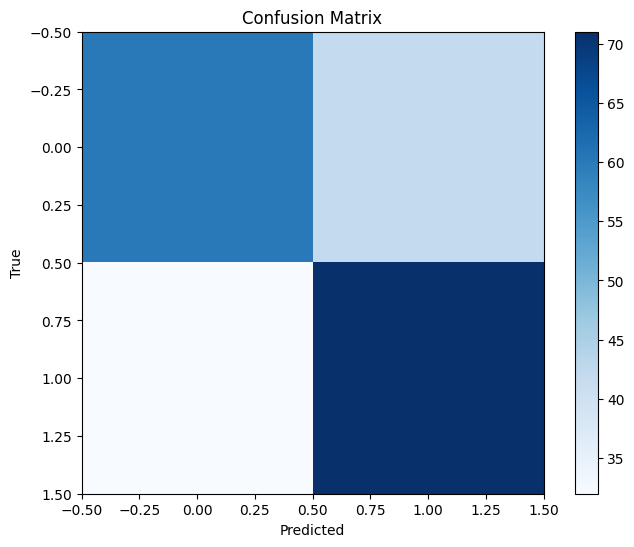

In [17]:
#importing libraries for evaluation
#for logistic regression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
y_pred_lr = logistic_regression.predict(X_test_lr)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Calculate confusion matrix
conf_matrix_lr = confusion_matrix(y_test_lr, y_pred_lr)

# Calculate precision
precision_lr = precision_score(y_test_lr, y_pred_lr)

# Calculate recall
recall_lr = recall_score(y_test_lr, y_pred_lr)

# Calculate F1 score
f1_lr = f1_score(y_test_lr, y_pred_lr)

# Print metrics
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_lr, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Decision Tree Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


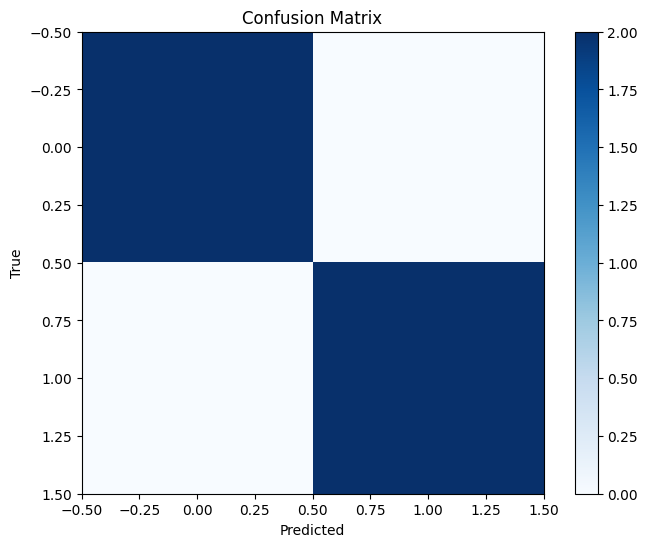

In [18]:
#for decision tree
y_pred_dt = decision_tree.predict(X_test_dt)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)

# Calculate confusion matrix
conf_matrix_dt = confusion_matrix(y_test_dt, y_pred_dt)

# Calculate precision
precision_dt = precision_score(y_test_dt, y_pred_dt)

# Calculate recall
recall_dt = recall_score(y_test_dt, y_pred_dt)

# Calculate F1 score
f1_dt = f1_score(y_test_dt, y_pred_dt)

# Print metrics
print("Decision Tree Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_dt, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
# Make predictions on the training data
y_pred_dt_train = decision_tree.predict(X_train_dt)

# Make predictions on the test data
y_pred_dt_test = decision_tree.predict(X_test_dt)

# Calculate and display accuracy for training and test data
accuracy_dt_train = accuracy_score(y_train_dt, y_pred_dt_train)
accuracy_dt_test = accuracy_score(y_test_dt, y_pred_dt_test)

print("Decision Tree Training Accuracy:", accuracy_dt_train)
print("Decision Tree Test Accuracy:", accuracy_dt_test)

# Calculate and display other metrics for training data
precision_dt_train = precision_score(y_train_dt, y_pred_dt_train)
recall_dt_train = recall_score(y_train_dt, y_pred_dt_train)
f1_dt_train = f1_score(y_train_dt, y_pred_dt_train)

print("Decision Tree Training Precision:", precision_dt_train)
print("Decision Tree Training Recall:", recall_dt_train)
print("Decision Tree Training F1 Score:", f1_dt_train)

# Calculate and display other metrics for test data
precision_dt_test = precision_score(y_test_dt, y_pred_dt_test)
recall_dt_test = recall_score(y_test_dt, y_pred_dt_test)
f1_dt_test = f1_score(y_test_dt, y_pred_dt_test)

print("Decision Tree Test Precision:", precision_dt_test)
print("Decision Tree Test Recall:", recall_dt_test)
print("Decision Tree Test F1 Score:", f1_dt_test)


Decision Tree Training Accuracy: 0.5625
Decision Tree Test Accuracy: 1.0
Decision Tree Training Precision: 0.5555555555555556
Decision Tree Training Recall: 0.625
Decision Tree Training F1 Score: 0.5882352941176471
Decision Tree Test Precision: 1.0
Decision Tree Test Recall: 1.0
Decision Tree Test F1 Score: 1.0


In [20]:
# Make predictions on the training data
y_pred_train_lr = logistic_regression.predict(X_train_lr)

# Make predictions on the test data
y_pred_test_lr = logistic_regression.predict(X_test_lr)

# Calculate and display accuracy for training and test data
accuracy_train_lr = accuracy_score(y_train_lr, y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test_lr, y_pred_test_lr)

print("Logistic Regression Training Accuracy:", accuracy_train_lr)
print("Logistic Regression Test Accuracy:", accuracy_test_lr)

# Calculate and display other metrics for training data
precision_train_lr = precision_score(y_train_lr, y_pred_train_lr)
recall_train_lr = recall_score(y_train_lr, y_pred_train_lr)
f1_train_lr = f1_score(y_train_lr, y_pred_train_lr)

print("Logistic Regression Training Precision:", precision_train_lr)
print("Logistic Regression Training Recall:", recall_train_lr)
print("Logistic Regression Training F1 Score:", f1_train_lr)

# Calculate and display other metrics for test data
precision_test_lr = precision_score(y_test_lr, y_pred_test_lr)
recall_test_lr = recall_score(y_test_lr, y_pred_test_lr)
f1_test_lr = f1_score(y_test_lr, y_pred_test_lr)

print("Logistic Regression Test Precision:", precision_test_lr)
print("Logistic Regression Test Recall:", recall_test_lr)
print("Logistic Regression Test F1 Score:", f1_test_lr)


Logistic Regression Training Accuracy: 0.6853658536585366
Logistic Regression Test Accuracy: 0.6390243902439025
Logistic Regression Training Precision: 0.6805251641137856
Logistic Regression Training Recall: 0.735224586288416
Logistic Regression Training F1 Score: 0.7068181818181818
Logistic Regression Test Precision: 0.6283185840707964
Logistic Regression Test Recall: 0.6893203883495146
Logistic Regression Test F1 Score: 0.6574074074074074


In [23]:
# Check for overfitting in Decision tree
if accuracy_dt_train > accuracy_dt_test:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")


The model is not overfitting.


In [24]:
# Check for overfitting in logistic regression
if accuracy_train_lr > accuracy_test_lr:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")


The model is overfitting.


In [25]:
#implementing 10-fold cross validation
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation
cross_val_scores = cross_val_score(logistic_regression, X_scaled, y, cv=10)

# Print cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate and print mean cross-validation accuracy
mean_accuracy = cross_val_scores.mean()
print("Mean Accuracy:", mean_accuracy)

# Check for overfitting
if mean_accuracy > 0.95:  # You can adjust this threshold as needed
    print("The model may be overfitting.")
else:
    print("The model is not overfitting.")


Cross-Validation Scores: [0.66019417 0.72815534 0.77669903 0.65048544 0.69902913 0.74509804
 0.60784314 0.61764706 0.64705882 0.60784314]
Mean Accuracy: 0.6740053302874548
The model is not overfitting.


In [26]:
#comparing both the models
model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression'],
    'Accuracy': [accuracy_dt, accuracy_lr]
})

# Display the comparison table
print(model_comparison)

                 Model  Accuracy
0        Decision Tree  1.000000
1  Logistic Regression  0.639024


Hence, Decision tree is the better model for this Heart-disease dataset